Aplicação de filtro de detecção de bordas
====

Usando o próprio tutorial da OpenCV,  desenvolva um programa para obter as bordas de uma imagem.

Utilize com referência os links [OpenCV: Sobel Derivatives](https://docs.opencv.org/4.6.0/d2/d2c/tutorial_sobel_derivatives.html) e [OpenCV: Canny Edge Detector](https://docs.opencv.org/4.6.0/da/d5c/tutorial_canny_detector.html)

Reproduza os exemplos do tutorial com uma imagem diferente e teste diferentes parâmetros das funções, mostrando o resultado.

OpenCV: Sobel Derivatives
====

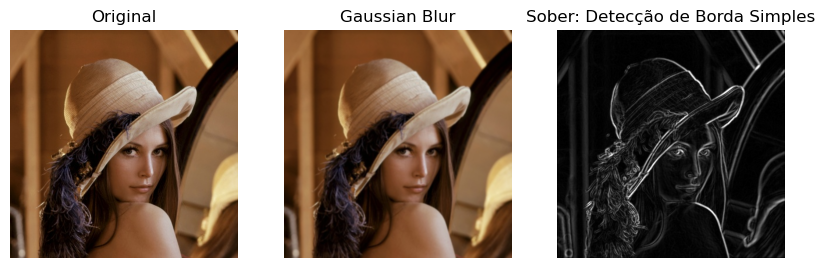

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

scale = 1
delta = 0
ddepth = cv.CV_16S

# Carregando a imagem
scr = cv.imread('lena.jpg', cv.IMREAD_COLOR)

#Aplicando o filtro gaussiano
img = cv.GaussianBlur(scr, (3, 3), 0)

#Transformando a imagem em escala de cinza
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#Aplicando Sobel na vertical e horizontal da imagem
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

#Tomando os valores absolutos
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

#Somando as duas imagens com ambas com peso de 50%
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

#Exibição dos resultados
plt.figure(figsize=(10,7))
plt.subplot(131), plt.imshow(cv.cvtColor(scr, cv.COLOR_BGR2RGB)), plt.title("Original"), plt.axis('off')
plt.subplot(132), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title("Gaussian Blur"), plt.axis('off')
plt.subplot(133), plt.imshow(grad, 'gray'), plt.title("Sober: Detecção de Borda Simples"), plt.axis('off')
plt.show()

Variando a escala da derivada:

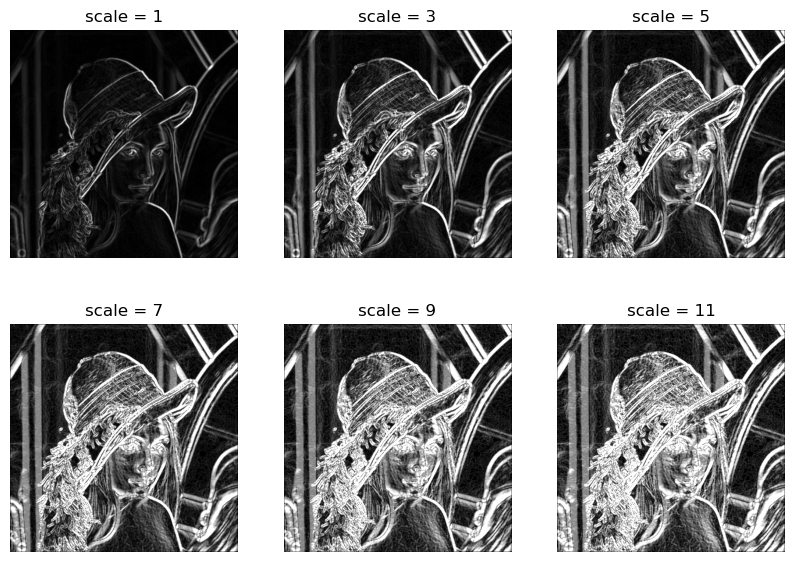

In [4]:
plt.figure(figsize=(10,7))

i=1
n=1

while i < 12:
    grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=i, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=i, delta=delta, borderType=cv.BORDER_DEFAULT)

    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)

    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    plt.subplot(230 + n), plt.imshow(grad, 'gray'), plt.title('scale = %s' % i), plt.axis('off')

    i+=2
    n+=1

plt.show()

Variando o tamanho do filtro Sobel:

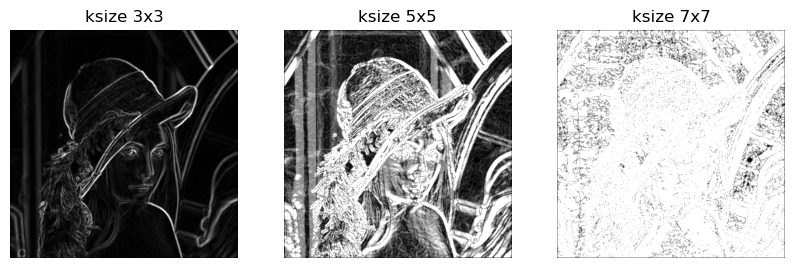

In [5]:
plt.figure(figsize=(10,7))

i=3
n=1

while i < 8:
    grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=i, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=i, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)

    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    plt.subplot(130 + n), plt.imshow(grad, 'gray'), plt.title('ksize %sx%s' % (i,i)), plt.axis('off')

    i+=2
    n+=1

plt.show()

OpenCV: Canny Edge Detector
====

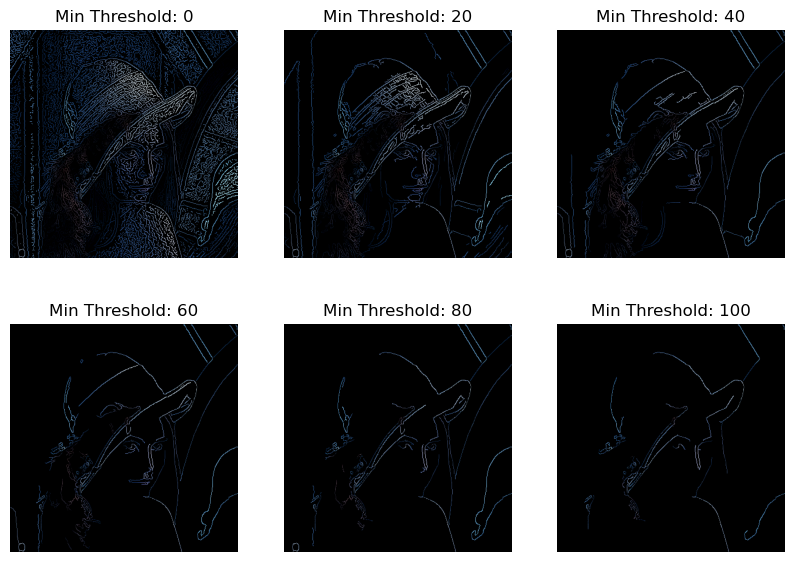

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt

#Parâmetros
max_lowThreshold = 100
title = 'Min Threshold: '
ratio = 3
kernel_size = 3

#Função que aplica a detecção de borda por Canny
def CannyThreshold(val):
    low_threshold = val
    img_blur = cv.blur(src_gray, (3,3))
    detected_edges = cv.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    return dst

#Carregando a imagem
src = cv.imread('lena.jpg')
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(10,7))

for i in range(6):
    result = CannyThreshold(i*20)
    plt.subplot(231 + i), plt.imshow(result, 'gray'), plt.title(title + str(i*20)), plt.axis('off')